### Examine eddy motion parameters; combine with QC spreadsheet for usability

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob
from datetime import date
today = date.today()

In [144]:
home = '/Users/lucindasisk/Desktop/Milgram/candlab/analyses/shapes/dwi/data/3_Eddy_Corrected'
proj = '/Users/lucindasisk/Box/LS_Folders/CANDLab/Projects/Trauma_DTI'

In [145]:
qc_data = pd.read_csv(proj + '/DiffusionQAShapes-ShapesDWIRawDataQAAl_DATA_2021-03-03_1332.csv').rename(columns = {'subid':'Subject', 'scan1_ranking':'Scan Quality'})
qc_data['Subject'] = qc_data['Subject'].str.split('-', expand=True)

In [163]:
subjects = pd.Series(glob(home + '/sub*')).str.replace(home + '/', '').tolist()
print('Reporting for {} subjects'.format(len(subjects)))

Reporting for 175 subjects


In [159]:
outputs = []
for i in range(0, len(subjects)):
    sub = subjects[i]
    file = pd.read_csv(home + '/{}/eddy_corrected.eddy_movement_rms'.format(sub), 
                   sep = ' ').rename(columns = {'0':"Absolute_RMS",'0.1':"Relative_RMS"}).drop(['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
    mean_rel_rms = file['Relative_RMS'].mean()
    mean_abs_rms = file['Absolute_RMS'].mean()
    outputs.append([sub, mean_rel_rms, mean_abs_rms])

In [160]:
mean_rms = pd.DataFrame(outputs, columns = ['Subject', 'Mean Relative RMS', 'Mean Absolute RMS'])
mean_rms['Subject'] = mean_rms['Subject'].str.replace('sub-', '')
mean_rms_qc = pd.merge(mean_rms, qc_data[['Subject', 'Scan Quality']], on = 'Subject', how = 'inner').sort_values(by='Scan Quality')
quality_dict = {'1':'Pass', '2':'Qualified Pass', '3':'Fail'}
mean_rms_qc['Scan Quality'] = mean_rms_qc['Scan Quality'].astype(str).replace(quality_dict)

<AxesSubplot:xlabel='Scan Quality', ylabel='Mean Relative RMS'>

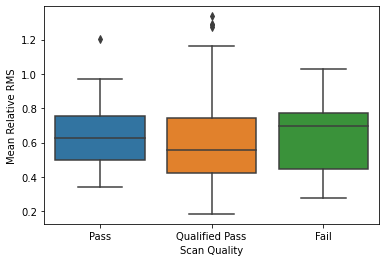

In [161]:
sns.boxplot(x='Scan Quality', y='Mean Relative RMS', data= mean_rms_qc)

<AxesSubplot:xlabel='Scan Quality', ylabel='Mean Absolute RMS'>

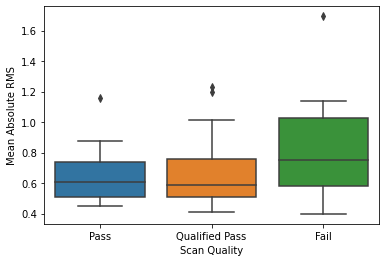

In [162]:
sns.boxplot(x='Scan Quality', y='Mean Absolute RMS', data= mean_rms_qc)